# Covid-19 Pre-existing Medical Condition Analysis using Plotly Express, Choropleth maps and WordCloud Text Visualization

## Task 1 : Importing all the necessary libraries

In [4]:
import pandas as pd       #Data analysis and Manipulation
import plotly.express as px    #Data Visualization (one line of code for one graph) 
import matplotlib.pyplot as plt   #Data Visualization for WordCloud
from wordcloud import WordCloud   #Wordcloud Text Visualization


In [5]:
import plotly.io as pio
pio.renderers.default = 'colab'     # To initialize plotly (default mode of plotly if OFF as it consumes a lot of space)

## Task 2 : Importing the dataset and Visualizing it (Dataset 1 : Worldometer dataset)

In [6]:
df = pd.read_csv("/Users/joohyun/Desktop/Projects/COVID_Worldometer/covid_worldometer_data.csv")
df

,S.no,Country,TotalCases,TotalDeaths,Total Recovered,Active cases,Totalcases/1M,TotalDeath/1M,iso_alpha
0,1,USA,"23,848,410","397,994","14,112,119","9,338,297","71,822","1,199",USA
1,2,India,"10,528,508","151,954","10,162,738","213,816","7,589",110,IND
2,3,Brazil,"8,326,115","207,160","7,339,703","779,252","39,021",971,BRA
3,4,Russia,"3,495,816","63,940","2,882,044","549,832","23,949",438,RUS
4,5,UK,"3,260,258","86,015","1,406,967","1,767,276","47,890","1,263",UKR
...,...,...,...,...,...,...,...,...,...
216,217,Wallis and Futuna,4,,1,3,359,NaN,WLF
217,218,Samoa,2,,2,0,10,NaN,WSM
218,219,Micronesia,1,,NaN,1,9,NaN,FSM
219,220,Vanuatu,1,,1,0,3,NaN,VUT


In [7]:
df.dtypes

S.no                int64
Country            object
TotalCases         object
TotalDeaths        object
Total Recovered    object
Active cases       object
Totalcases/1M      object
TotalDeath/1M      object
iso_alpha          object
dtype: object

In [8]:
df["TotalCases"] = df["TotalCases"].str.replace(",", "")
df["TotalDeaths"] = df["TotalDeaths"].str.replace(",", "")
df["TotalDeaths"] = df["TotalDeaths"].str.replace(" ", "")
df["Totalcases/1M"] = df["Totalcases/1M"].str.replace(" ", "")
df["TotalDeath/1M"] = df["TotalDeath/1M"].str.replace(" ", "")
df.dtypes

S.no                int64
Country            object
TotalCases         object
TotalDeaths        object
Total Recovered    object
Active cases       object
Totalcases/1M      object
TotalDeath/1M      object
iso_alpha          object
dtype: object

In [9]:
df["TotalCases"] = df["TotalCases"].astype(int)
df['TotalDeaths'] = pd.to_numeric(df['TotalDeaths'], errors='coerce')
df['Totalcases/1M'] = pd.to_numeric(df['Totalcases/1M'], errors='coerce')
df['TotalDeath/1M'] = pd.to_numeric(df['TotalDeath/1M'], errors='coerce')

In [10]:
df.dtypes

S.no                 int64
Country             object
TotalCases           int64
TotalDeaths        float64
Total Recovered     object
Active cases        object
Totalcases/1M      float64
TotalDeath/1M      float64
iso_alpha           object
dtype: object

In [11]:
fig = px.bar(df.head(15), x = "Country", y = "TotalCases", color = "Country", title = "Total Cases of Covid-19 in Top 15 Countries")
fig.update_layout(yaxis={'categoryorder': 'total descending'})
fig.show()


In [12]:
fig = px.bar(df.head(15), x = "Country", y = "TotalDeaths", color = "Country", title = "Total Deaths of Covid-19 in Top 15 Countries")
fig.update_layout(yaxis={'categoryorder': 'total descending'})
fig.show()

In [13]:
px.scatter(df, x = "TotalCases", y = "TotalDeaths", color = "Country", title = "Total Cases vs Total Deaths population of Covid-19 in all Countries")

## Task 3: Geographic Visualization using Choropleth maps

Dataset 1
parameters= dataset, locations= ISOALPHA, color, hover_name, color_continuous_scale= [RdYlGn, Blues, Viridis...], 

In [14]:
px.choropleth(df, 
              locations="iso_alpha",
              hover_name="Country",
              color="TotalDeaths",
              projection="orthographic",
              color_continuous_scale="Viridis",
              title="Total Deaths of Covid-19 in all Countries"
              
              )

In [15]:
px.choropleth(df, 
              locations="iso_alpha",
              hover_name="Country",
              color="TotalDeaths",
              projection="equirectangular",
              color_continuous_scale="plasma",
              title="Total Deaths of Covid-19 in all Countries"
              
              )

In [16]:
px.choropleth(df, 
              locations="iso_alpha",
              hover_name="Country",
              color="TotalDeaths",
              scope='asia',
              color_continuous_scale="plasma",
              title="Total Deaths of Covid-19 in all Countries"
              )

## Task 4: Importing and Analyzing the dataset(Dataset 2: Covid-19 Pre-existing condition Medical dataset; source: CDC,US)

In [17]:
df1 = pd.read_csv("/Users/joohyun/Downloads/US_medical_data.csv")
df1

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198.0,205.0,NaN
1,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968.0,985.0,NaN
2,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537.0,2584.0,NaN
3,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369.0,7555.0,NaN
4,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378.0,18829.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12415,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,65-74,321.0,321.0,NaN
12416,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,75-84,366.0,366.0,NaN
12417,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,85+,264.0,264.0,NaN
12418,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,Not stated,0.0,0.0,NaN


In [18]:
df1.groupby(["State"]).count()

,Data as of,Start Week,End Week,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
State,,,,,,,,,,
AK,230,230,230,230,230,230,230,128,128,102
AL,230,230,230,230,230,230,230,186,189,44
AR,230,230,230,230,230,230,230,185,186,45
AZ,230,230,230,230,230,230,230,195,197,35
CA,230,230,230,230,230,230,230,209,210,21
CO,230,230,230,230,230,230,230,178,181,52
CT,230,230,230,230,230,230,230,181,183,49
DC,230,230,230,230,230,230,230,164,165,66
DE,230,230,230,230,230,230,230,140,142,90


In [19]:
df1.groupby(["Condition Group"]).count()

,Data as of,Start Week,End Week,State,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
Condition Group,,,,,,,,,,
All other conditions and causes (residual),540,540,540,540,540,540,540,460,485,80
Alzheimer disease,540,540,540,540,540,540,540,459,459,81
COVID-19,540,540,540,540,540,540,540,481,481,59
Circulatory diseases,3780,3780,3780,3780,3780,3780,3780,2889,2897,891
Diabetes,540,540,540,540,540,540,540,437,437,103
"Intentional and unintentional injury, poisoning, and other adverse events",540,540,540,540,540,540,540,353,412,187
Malignant neoplasms,540,540,540,540,540,540,540,394,398,146
Obesity,540,540,540,540,540,540,540,372,372,168
Renal failure,540,540,540,540,540,540,540,420,422,120


In [20]:
df1.groupby(["Condition"]).count()

,Data as of,Start Week,End Week,State,Condition Group,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
Condition,,,,,,,,,,
Adult respiratory distress syndrome,540,540,540,540,540,540,540,423,423,117
All other conditions and causes (residual),540,540,540,540,540,540,540,460,485,80
Alzheimer disease,540,540,540,540,540,540,540,459,459,81
COVID-19,540,540,540,540,540,540,540,481,481,59
Cardiac arrest,540,540,540,540,540,540,540,418,418,122
Cardiac arrhythmia,540,540,540,540,540,540,540,403,403,137
Cerebrovascular diseases,540,540,540,540,540,540,540,406,406,134
Chronic lower respiratory diseases,540,540,540,540,540,540,540,422,423,118
Diabetes,540,540,540,540,540,540,540,437,437,103


In [21]:
df1.groupby(["Age Group"]).count()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,COVID-19 Deaths,Number of Mentions,Flag
Age Group,,,,,,,,,,
0-24,1242,1242,1242,1242,1242,1242,1242,804,812,438
25-34,1242,1242,1242,1242,1242,1242,1242,654,670,588
35-44,1242,1242,1242,1242,1242,1242,1242,679,700,563
45-54,1242,1242,1242,1242,1242,1242,1242,816,837,426
55-64,1242,1242,1242,1242,1242,1242,1242,960,971,282
65-74,1242,1242,1242,1242,1242,1242,1242,1081,1092,161
75-84,1242,1242,1242,1242,1242,1242,1242,1126,1131,116
85+,1242,1242,1242,1242,1242,1242,1242,1101,1108,141
All Ages,1242,1242,1242,1242,1242,1242,1242,1203,1206,39


## Task 5: Visualizing the Pre-existing condition Medical dataset

In [22]:
filter1 = df1[(df1["State"]== "US")]

In [23]:
px.bar(df1, 
       x = "Age Group", y = "COVID-19 Deaths",
       color = "Condition",
       hover_name = "Condition",
       log_y = True,
         title = "Covid-19 Deaths in US by Age Group and Condition"
       )

In [24]:
px.bar(filter1, 
       x='Age Group', y= 'COVID-19 Deaths', 
       color= 'Condition Group', 
       hover_name= 'Condition', 
       )

## Task 6: WordCloud Text Visualization

In [25]:
#Step a= Convert the columns with conditions and condition group into list using tolist() function
#Step b= Convert the list to one single string
#Step c= Convert the string into WordCloud
# WordCloud imported in task 1. # WordCloud visualization needs matplotlib

In [26]:
filter2 = df1[(df1["State"]== "US") & (df1["Age Group"] == "All Ages")] 

In [27]:
filter2.columns

Index(['Data as of', 'Start Week', 'End Week', 'State', 'Condition Group',
       'Condition', 'ICD10_codes', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions', 'Flag'],
      dtype='object')

In [28]:
px.bar(filter2,
       x = "Condition Group", y = "COVID-19 Deaths",
       color = "COVID-19 Deaths",
       hover_name = "Condition",
       )

In [29]:
filter3 = df1[(df1["Condition"] == "Influenza and pneumonia") & (df1["Age Group"] == "All Ages")]

In [30]:
px.bar(filter3,
       x = "State", y = "COVID-19 Deaths",
       color = "State",
       log_y = True
       )

### WordCloud 1- Condition group

In [31]:
list1 = filter2["Condition Group"].tolist()

In [32]:
string1 ="".join(list1)

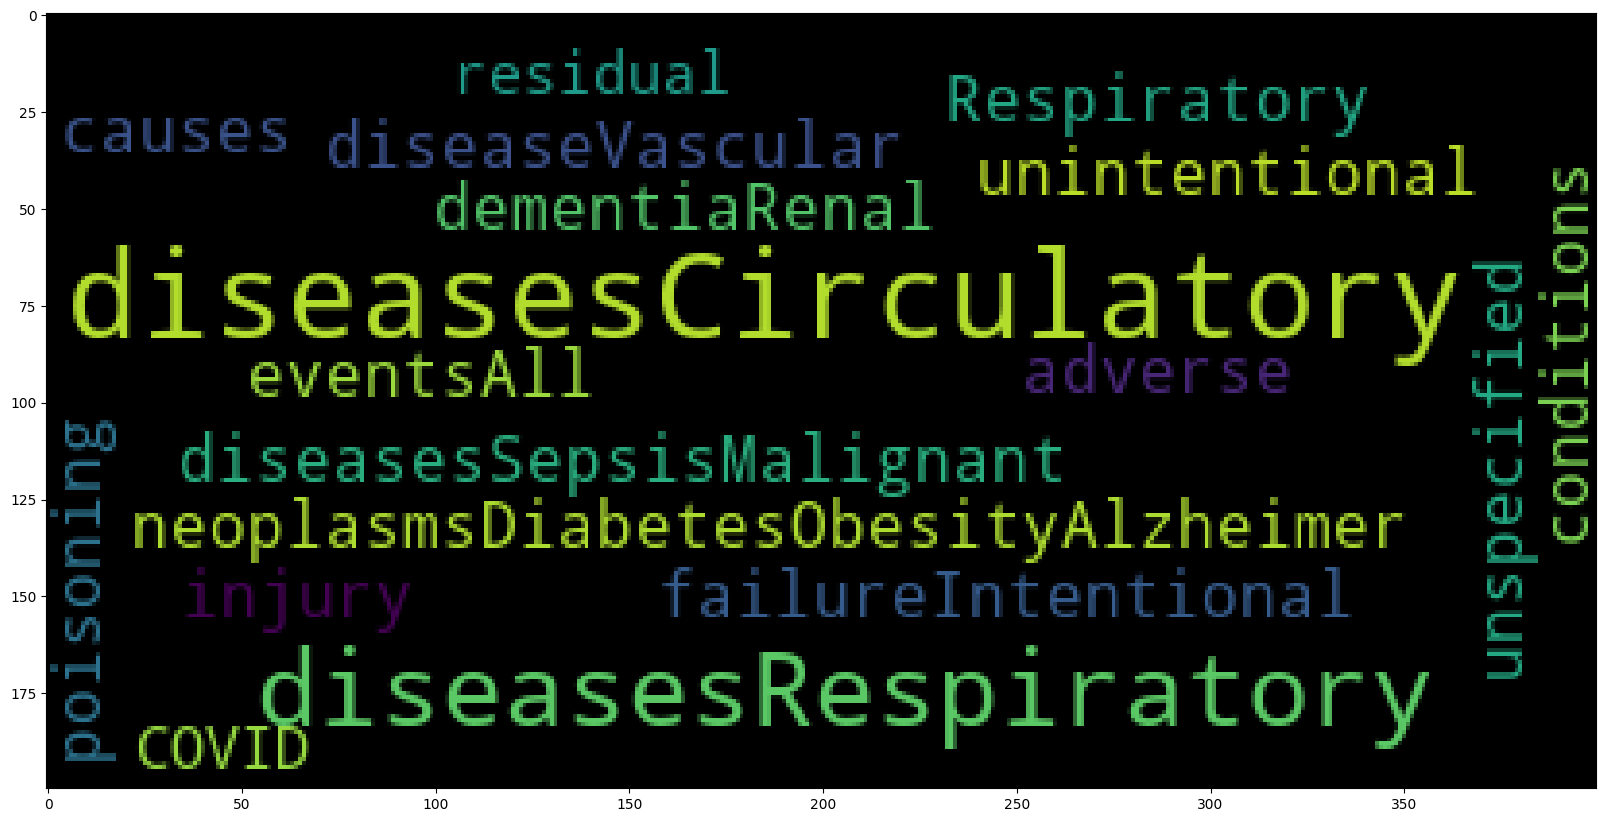

In [33]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string1))

### WordCloud 2- Conditions

In [34]:
list2 = filter2["Condition"].tolist()

In [35]:
string2 ="".join(list2)

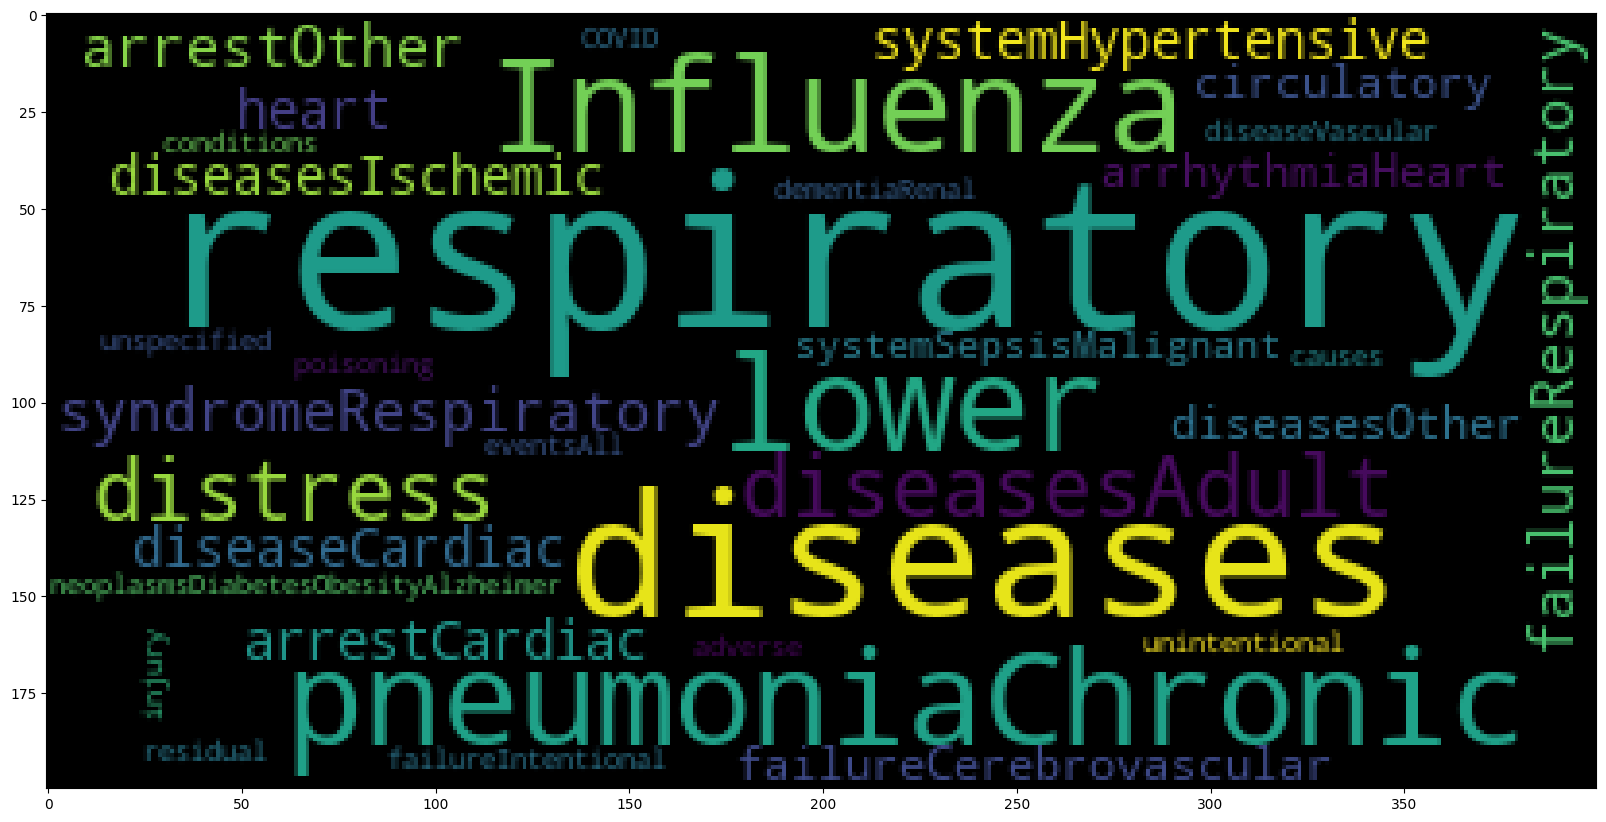

In [36]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string2))